## Computer Vision Projects : pose detection and classification 
#### Melika Heydari Rad 

___

In [1]:
import cv2 
import numpy as np
import mediapipe as mp 
import matplotlib.pyplot as plt 
import math
from time import time

In [2]:
print(cv2.__version__)
print(np.__version__)
print(mp.__version__)


4.8.0
1.23.4
0.10.5


___

### 1. Detecting poses in a single image

In [33]:
# some initializations

mp_pose = mp.solutions.pose

# note: model_complexity=2 --> leads to dead kernel !! i dunno why ...
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)

mp_drawing = mp.solutions.drawing_utils

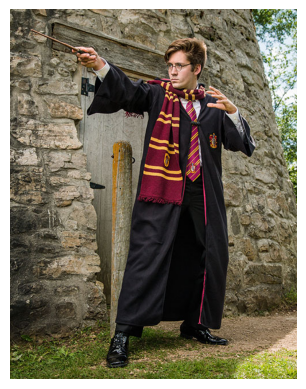

In [42]:
# visualizing the sample image

img = cv2.imread('harry-potter-costume-adult.jpg')
plt.imshow(img[:,:,::-1]); plt.axis('off');

In [48]:
# detecting pose
results = pose.process(img[:,:,::-1])

# printing some of the detected landmarks
if results.pose_landmarks:
    for i in range(4):
        print(mp_pose.PoseLandmark(i).name, "\n", results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value])

NOSE 
 x: 0.5614777207374573
y: 0.17122897505760193
z: -0.4465194344520569
visibility: 0.9999780654907227

LEFT_EYE_INNER 
 x: 0.5827373266220093
y: 0.15383487939834595
z: -0.43021661043167114
visibility: 0.9999550580978394

LEFT_EYE 
 x: 0.5932653546333313
y: 0.1540198028087616
z: -0.4301980137825012
visibility: 0.9999421834945679

LEFT_EYE_OUTER 
 x: 0.603319525718689
y: 0.15441524982452393
z: -0.4301837086677551
visibility: 0.9999428987503052



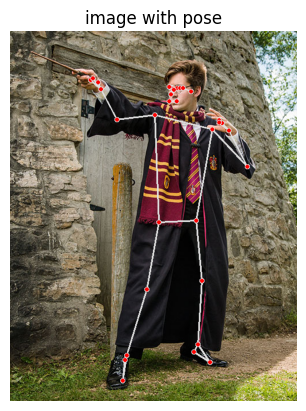

In [56]:
img2 = img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img2, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    plt.imshow(img2[:,:,::-1]); plt.title('image with pose'); plt.axis('off');

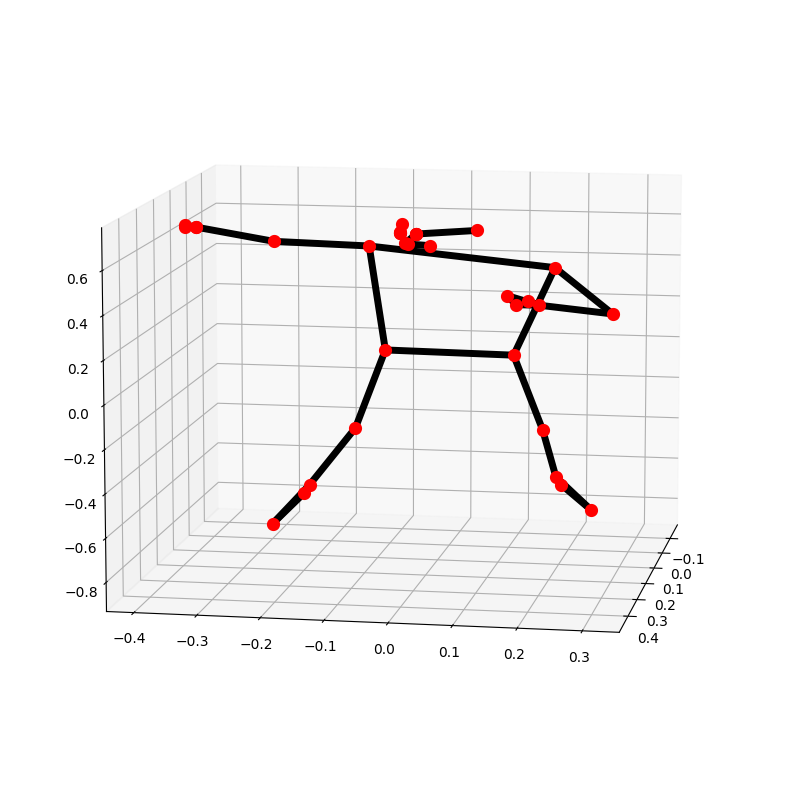

In [53]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

#### 1.1 The whole code at once

here we define a function for pose detection  

In [62]:
def detectPose(img_path):
    """
    a function to detect pose on an inpute image.
    it shows the landmarks on the input image as well as 
    returning the list of detected landmarks.
    
    required imports: 
        import cv2 
        import numpy as np
        import mediapipe as mp 
        import matplotlib.pyplot as plt
        
    arguments: 
        img_path:  the path to which the image exists 
        
    returns: 
        output_image: the input image on which the landmarks are drawn.
        landmarks: a list of detected landmarks(in original scale).
    """

    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=1, min_detection_confidence=0.3)
    mp_drawing = mp.solutions.drawing_utils

    img = cv2.imread(img_path)
    results = pose.process(img[:,:,::-1])

    img2 = img.copy()
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=img2, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        plt.imshow(img2[:,:,::-1]); plt.title('image with pose'); plt.axis('off');
        
    return 

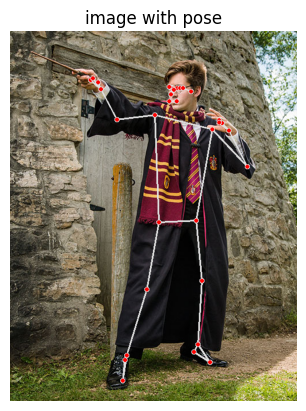

In [63]:
detect_pose('harry-potter-costume-adult.jpg')

___

### 2. Classifying poses in a single image

In [66]:
# defining a function to calculate angles 

def calcAngle(landmark1, landmark2, landmark3):
    """
    a function to calculate angle between three different landmarks.
    
    arguments:  
        landmark1
        landmark2
        landmark3
        
    returns:
        angle: angle in degrees
        
    """
    
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
    
    if angle < 0:
        angle += 360
        
    return angle

In [ ]:
# defining a function to classify the detected pose

def classifyPose(landmarks, )